In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
# # Initialize the model, load the data
# cfg, params, obs_data, um_data = asap.fitting.initial_model(config_file, verbose=True)

# # Load in the final sampling results
# (mod_result_samples, 
#  mod_result_chains, 
#  mod_result_lnprob, 
#  mod_result_best, _, _) = io.load_npz_results(result_file)


In [53]:
asap_sample = np.load('asap_baryonification_B_sample.npz')

asap_sample.files

['samples', 'lnprob', 'best', 'mean', 'chains', 'position', 'acceptance']

In [54]:
asap_sample['best']

array([ 5.95631116e-01,  1.18373235e+01, -2.63999668e-02,  4.47761956e-03,
        6.72088829e-01, -1.65952884e-01,  3.73271472e-01])

In [29]:
asap_sample['lnprob']

array([[-72.99309243, -72.73072732, -68.40625765, ..., -70.18352958,
        -69.05752349, -67.2261637 ],
       [-72.73577732, -72.90536037, -68.43877037, ..., -70.77395181,
        -68.91974195, -67.27099247],
       [-72.53849072, -72.91028339, -68.23121235, ..., -70.73870474,
        -69.34663719, -67.27099247],
       ...,
       [-68.17643828, -71.74009231, -68.46692871, ..., -67.64956485,
        -68.63832086, -69.57139926],
       [-68.23746089, -71.77169178, -68.24187318, ..., -67.59204071,
        -68.64934874, -69.57408535],
       [-68.18266483, -71.78804451, -68.12668553, ..., -67.6133718 ,
        -68.64934874, -69.53614656]])

In [17]:
len(asap_sample['lnprob'])

1000

In [55]:
asap_sample['samples'].shape

(2304000, 7)

In [39]:
len(asap_sample['lnprob'])

1000

In [40]:
len(asap_sample['lnprob'][0])

256

In [37]:
asap_sample['lnprob'].shape

(1000, 256)

In [44]:
asap_sample['lnprob'].flatten()

array([-72.99309243, -72.73072732, -68.40625765, ..., -67.6133718 ,
       -68.64934874, -69.53614656])

In [33]:
asap_sample['samples'].shape

(256000, 7)

In [8]:
no_baryonification_truths = [0.602, 11.846, -0.012, 0.003, 0.649, -0.176, 0.377]
#from https://arxiv.org/pdf/1811.01139.pdf

In [6]:
len(asap_sample['samples'])

256000

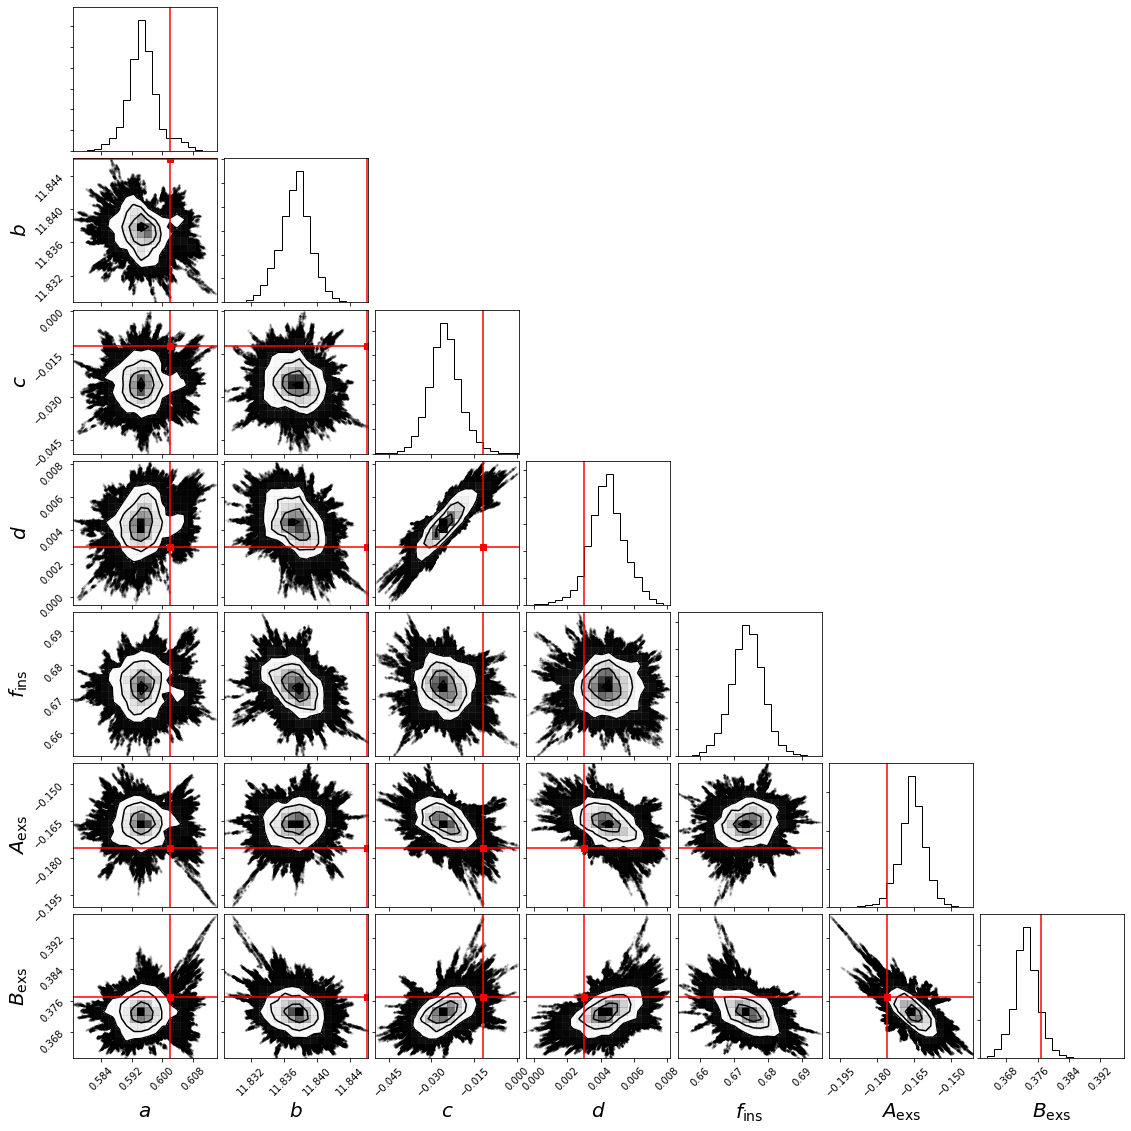

In [58]:
params_label = [r'$a$', r'$b$', r'$c$', r'$d$', 
                r'$f_{\rm ins}$', r'$A_{\rm exs}$', r'$B_{\rm exs}$']

params_range = [(0.56, 0.62), (11.800, 11.818), 
                (-0.02, 0.04), (0.01, 0.015), 
                (0.78, 0.84), 
                (-0.22, -0.162), (0.29, 0.41)]
title_fmt = '.3f'

figure = corner.corner(asap_sample['samples'][1000000:],
                       truths=no_baryonification_truths, labels= params_label,
                       title_fmt = title_fmt, truth_color='red', label_kwargs={'fontsize':20}) #range = params_range,



# step plot 

In [63]:
asap_sample['samples'].T.shape

(7, 2304000)

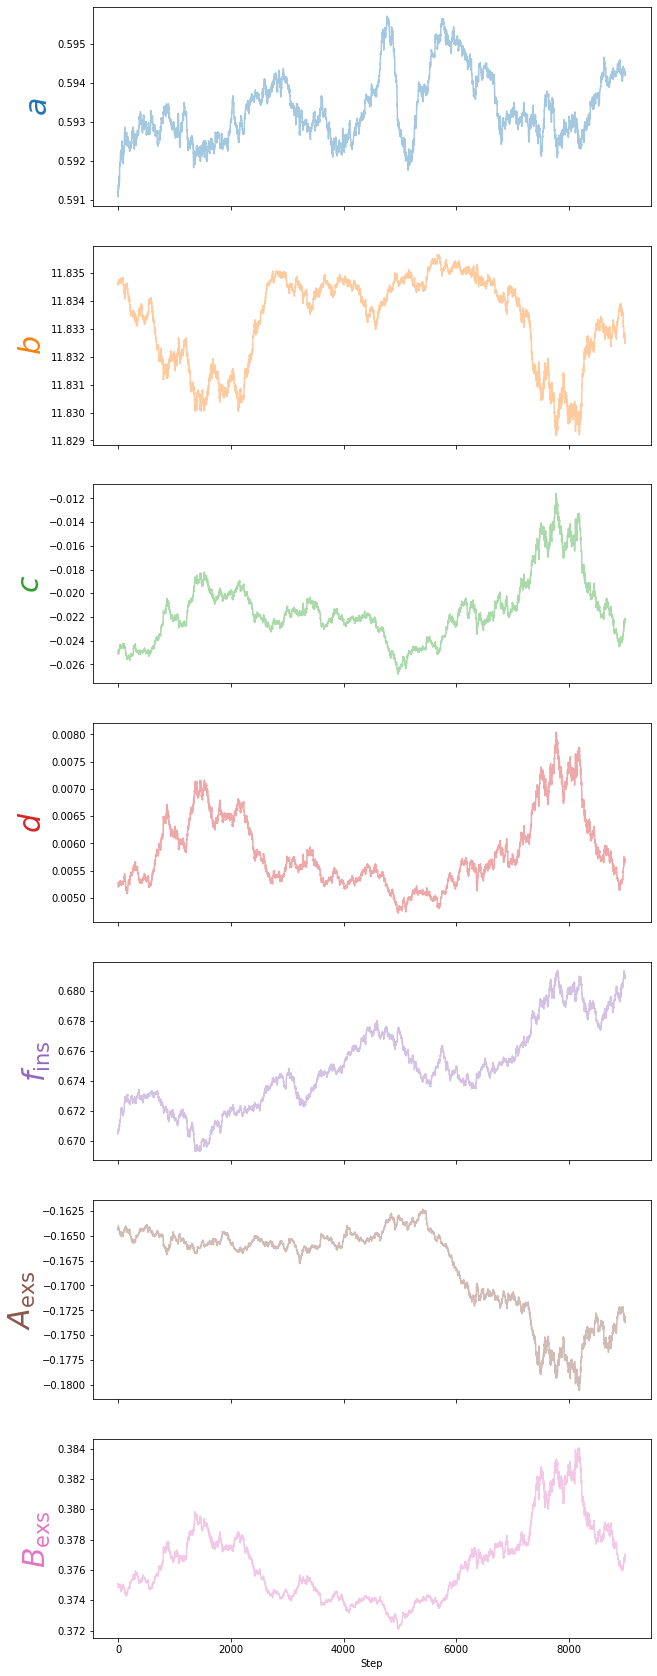

In [65]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

f, axes = plt.subplots(7, 1, sharex=True, figsize=[10,30])

for i, parameter in enumerate(asap_sample['samples'].T):
        axes[i].plot(range(9000), parameter[:9000], color=new_colors[i], alpha=0.4)
        axes[i].set_ylabel(params_label[i], color=new_colors[i], fontsize=30)
#         axes[i].plot(range(len(parameter)), parameter, color=new_colors[i], alpha=0.4)
#         axes[i].set_ylabel(params_label[i], color=new_colors[i], fontsize=30)
#     axes[i].axvline(burnin, c='r')
plt.xlabel('Step') 
plt.show()


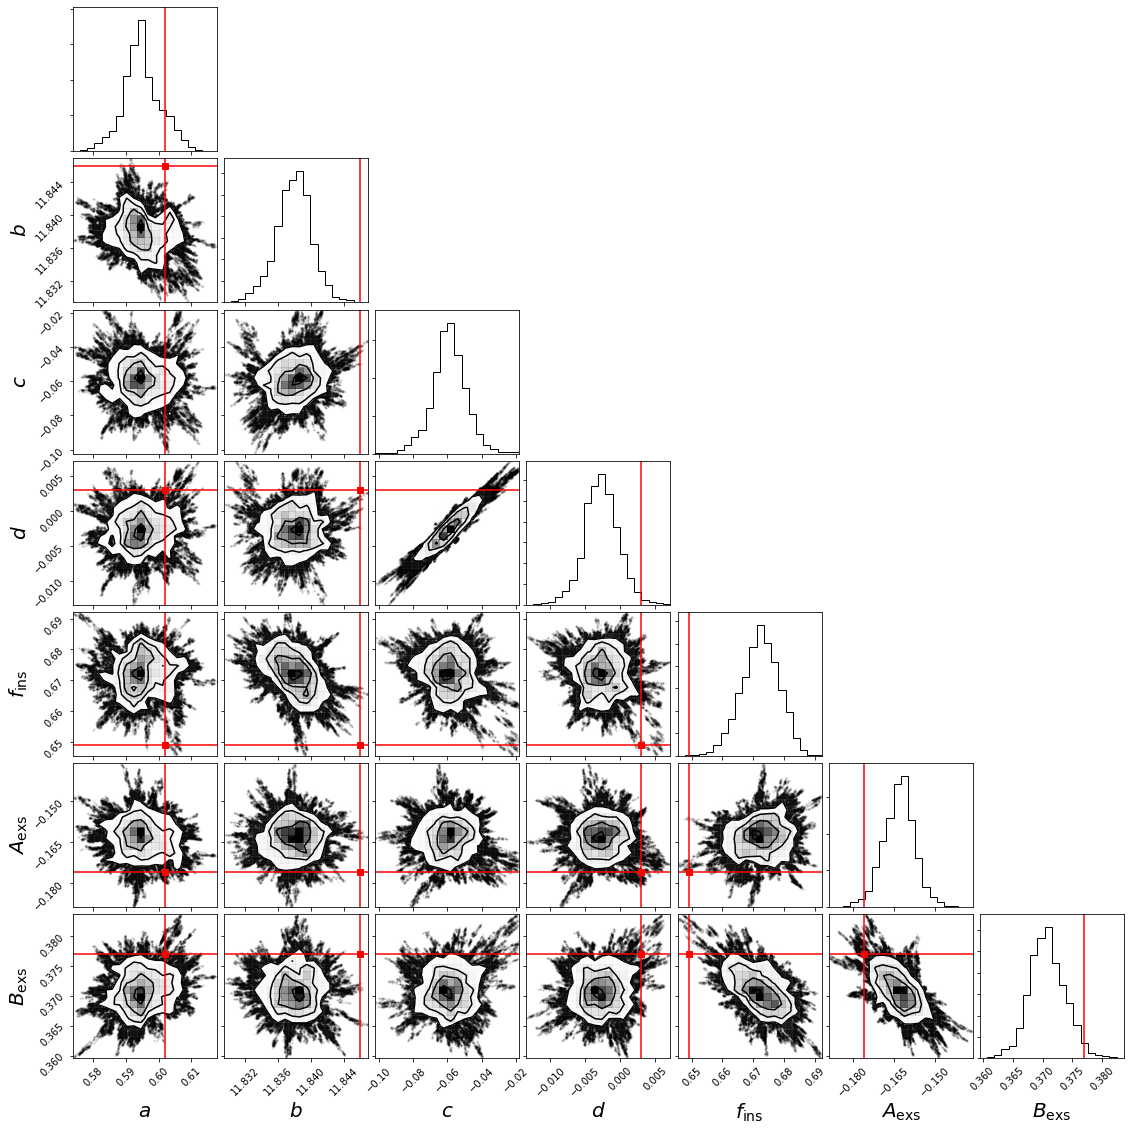

In [52]:
params_label = [r'$a$', r'$b$', r'$c$', r'$d$', 
                r'$f_{\rm ins}$', r'$A_{\rm exs}$', r'$B_{\rm exs}$']

params_range = [(0.56, 0.62), (11.800, 11.818), 
                (-0.02, 0.04), (0.01, 0.015), 
                (0.78, 0.84), 
                (-0.22, -0.162), (0.29, 0.41)]
title_fmt = '.3f'

figure = corner.corner(asap_sample['samples'], weights=-asap_sample['lnprob'].flatten('F'),
                       truths=no_baryonification_truths, labels= params_label,
                       title_fmt = title_fmt, truth_color='red', label_kwargs={'fontsize':20}) #range = params_range,



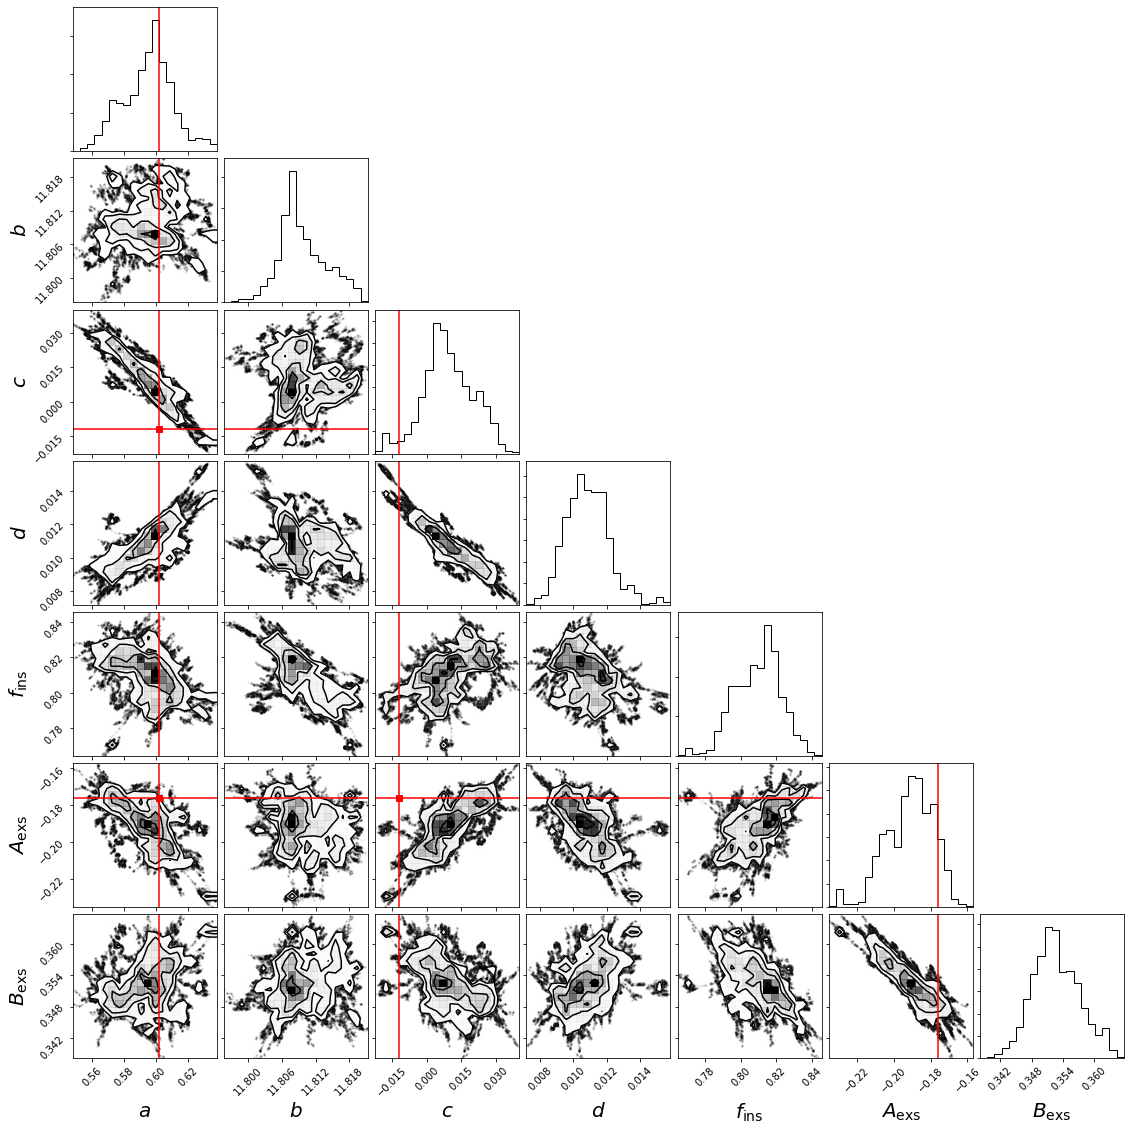

In [21]:
params_label = [r'$a$', r'$b$', r'$c$', r'$d$', 
                r'$f_{\rm ins}$', r'$A_{\rm exs}$', r'$B_{\rm exs}$']

params_range = [(0.56, 0.62), (11.800, 11.818), 
                (-0.02, 0.04), (0.01, 0.015), 
                (0.78, 0.84), 
                (-0.22, -0.162), (0.29, 0.41)]
title_fmt = '.3f'

figure = corner.corner(asap_sample['samples'], truths=no_baryonification_truths, labels= params_label,
              title_fmt = title_fmt, truth_color='red', label_kwargs={'fontsize':20}) #range = params_range,